In [1]:
# Setup Python path and imports
import sys
from pathlib import Path

# Add the project root to Python path
project_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
sys.path.append(str(project_root))

# ML toolbox imports
from ml_toolbox.data_loader import DatasetManager, DataLoader

# Initialize dataset manager
dataset_path = project_root / "data_set"
dm = DatasetManager(dataset_path)

# Initialize data loader 
data_loader = DataLoader(dataset_path)

# Get dataset index and statistics
index = dm.get_index()
stats = dm.get_statistics()

print(f"Available conditions: {index['conditions']}")
print(f"Available frequencies: {index['frequencies']}")
print(f"Available loads: {index['loads']}")
print(f"Total files: {stats['total_files']}")

Available conditions: ['faulty_bearing', 'healthy', 'misalignment', 'system_misalignment']
Available frequencies: ['10hz', '20hz', '30hz', '40hz']
Available loads: ['no_load', 'under_load']
Total files: 134


In [2]:
# Import the new analysis modules
from ml_toolbox.analysis import (
    run_comprehensive_frequency_analysis,
    plot_feature_importance_comparison, 
    compare_top_features_across_frequencies
)

# Define frequencies to analyze
frequencies_to_analyze = ["20hz", "30hz"]
max_windows_per_class = 50
window_length = 2048

print(f"Analysis Configuration:")
print(f"  Frequencies: {frequencies_to_analyze}")
print(f"  Load condition: no load")
print(f"  Max windows per class: {max_windows_per_class}")
print(f"  Window length: {window_length} samples")
print(f"  Total expected windows: ~{max_windows_per_class * len(frequencies_to_analyze) * 4} (4 classes)")
print("=" * 60)

Analysis Configuration:
  Frequencies: ['20hz', '30hz']
  Load condition: no load
  Max windows per class: 50
  Window length: 2048 samples
  Total expected windows: ~400 (4 classes)


In [ ]:
# Run CV analysis across all frequencies with configurable window count
cv_results = run_comprehensive_frequency_analysis(
    data_loader, 
    frequencies_to_analyze, 
    load="under_load",
    max_windows_per_class=max_windows_per_class,
    window_length=window_length,
    export_to_excel=True,
    output_dir="test_output"
)

# For feature importance analysis, we'll use the new SHAP analysis instead
print("CV analysis completed. For feature importance analysis, use run_comprehensive_shap_analysis instead.")

INFO:ml_toolbox.data_loader.data_loader:Loading 7 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 7 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 50 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 50 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 50 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/150 windows


Starting comprehensive analysis for frequencies: ['20hz', '30hz']
Load condition: under_load
Max windows per class: 50
Excel export enabled - output directory: test_output
Loading 20hz under_load data...
Loaded 7 current sensor files for 20hz
Created 150 windows for 20hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/150 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 150 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 20hz
Features data written to Excel: test_output/features_20hz_under_load.xlsx
Dataset info: 150 samples, 112 features
Label distribution: {np.int64(1): np.int64(50), np.int64(2): np.int64(50), np.int64(3): np.int64(50)}
Sheets created: Dataset_Info, Feature_Names, Label_Distribution, Features_Data, Feature_Statistics
Evaluating model for 20hz...
20hz - Mean CV Accuracy: 0.987 ± 0.016
Computing feature importance for 20hz...


INFO:ml_toolbox.data_loader.data_loader:Loading 7 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 7 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 50 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 50 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 50 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/150 windows


20hz analysis completed
Loading 30hz under_load data...
Loaded 7 current sensor files for 30hz
Created 150 windows for 30hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/150 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 150 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 30hz
Features data written to Excel: test_output/features_30hz_under_load.xlsx
Dataset info: 150 samples, 112 features
Label distribution: {np.int64(1): np.int64(50), np.int64(2): np.int64(50), np.int64(3): np.int64(50)}
Sheets created: Dataset_Info, Feature_Names, Label_Distribution, Features_Data, Feature_Statistics
Evaluating model for 30hz...
30hz - Mean CV Accuracy: 1.000 ± 0.000
Computing feature importance for 30hz...
30hz analysis completed
CV results written to Excel: test_output/cv_results_under_load.xlsx
Sheets created: CV_Summary, CV_Scores_Detail, Label_Distribution, Analysis_Info
Feature importance results written to Excel: test_output/feature_importance_under_load.xlsx
Analysis completed for 2 frequencies


PERFORMANCE SUMMARY ACROSS FREQUENCIES
Frequency  Mean_Accuracy  Std_Accuracy  Best_Fold  Worst_Fold  Stability_Score  N_Samples  N_Features
     30hz       1.000000       0.00000        1.0    1.000000     1.000000e+08        150         112
     20hz       0.986667       0.01633        1.0    0.966667     6.042071e+01        150         112

COMPREHENSIVE CROSS-VALIDATION ANALYSIS


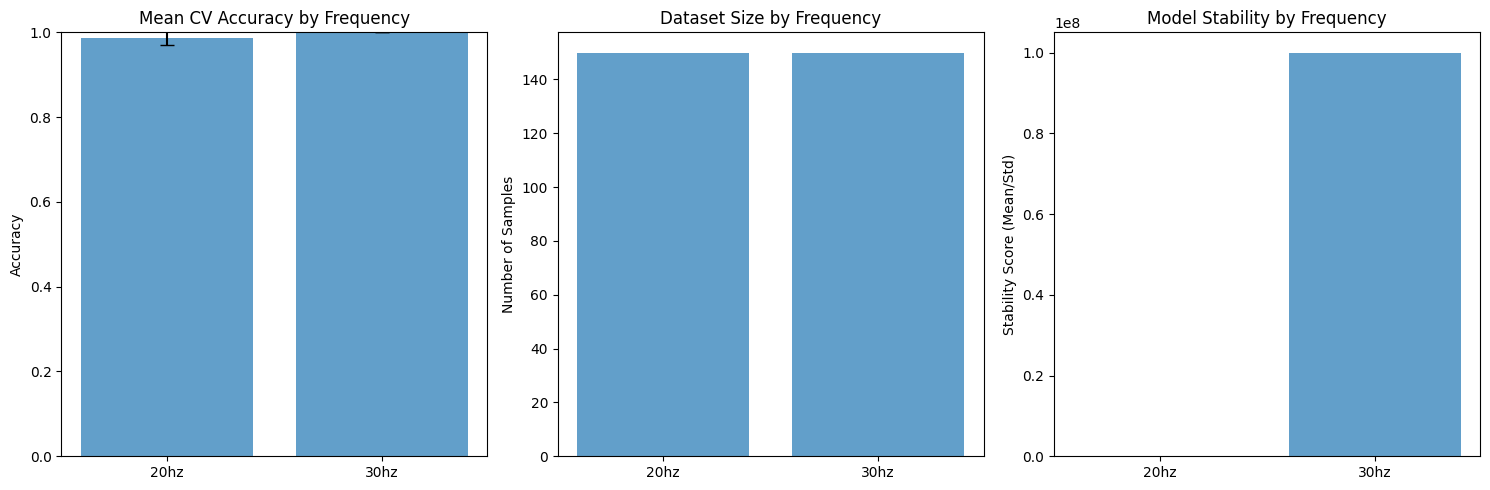


FREQUENCY PERFORMANCE TRENDS


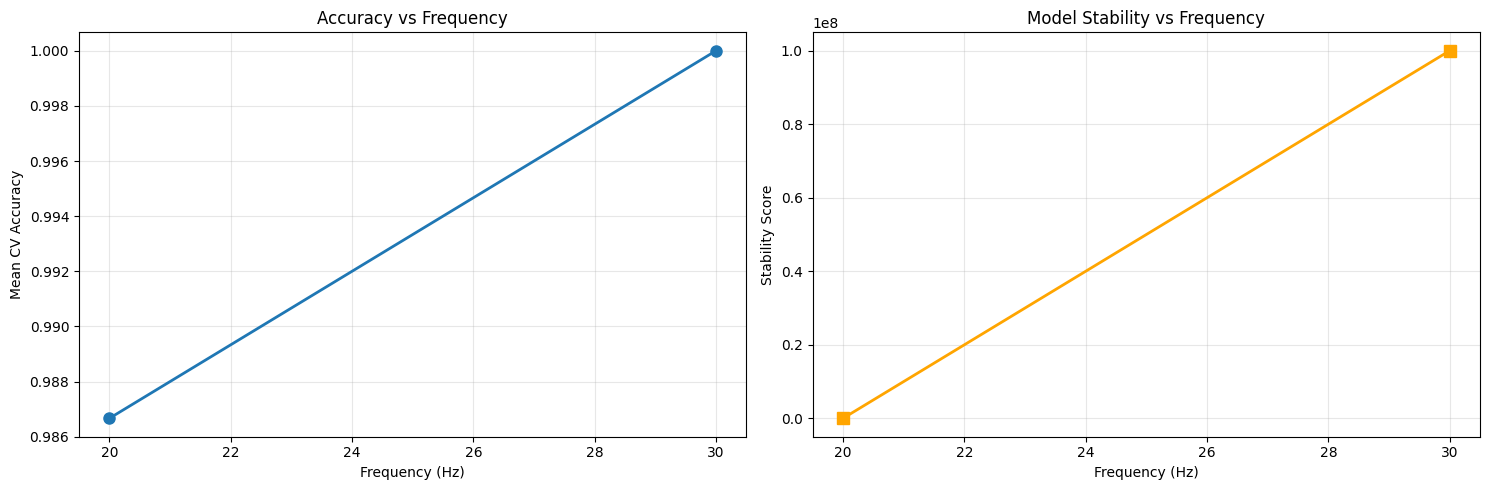


FREQUENCY ANALYSIS INSIGHTS:
Best accuracy: 30Hz (1.000)
Most stable: 30Hz (stability: 100000000.00)
Accuracy trend: increasing with frequency


In [4]:
# Display comprehensive results
from ml_toolbox.analysis import (
    plot_cv_results_comparison, 
    create_performance_summary,
    analyze_frequency_performance_trends
)

# 1. Performance Summary Table
print("PERFORMANCE SUMMARY ACROSS FREQUENCIES")
print("=" * 60)
performance_summary = create_performance_summary(cv_results)
print(performance_summary.to_string(index=False))

# 2. Plot comprehensive CV results comparison
print("\nCOMPREHENSIVE CROSS-VALIDATION ANALYSIS")
plot_cv_results_comparison(cv_results)

# 3. Analyze performance trends
print("\nFREQUENCY PERFORMANCE TRENDS")
analyze_frequency_performance_trends(cv_results)

DETAILED CV SCORES BY FOLD FOR EACH FREQUENCY


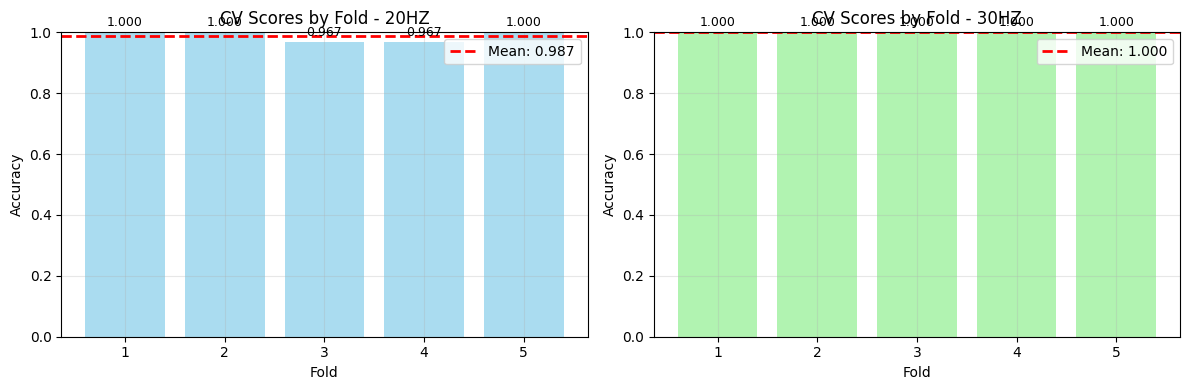

In [5]:
# Improved CV Scores Visualization
from ml_toolbox.analysis import plot_cv_scores_by_fold

print("DETAILED CV SCORES BY FOLD FOR EACH FREQUENCY")
print("=" * 60)
plot_cv_scores_by_fold(cv_results)

FEATURE IMPORTANCE COMPARISON

TOP 10 FEATURES for 20HZ:
   1. current_phase_b_rms       | 0.0689 ± 0.0037
   2. current_phase_b_log_energy | 0.0660 ± 0.0045
   3. current_phase_b_var       | 0.0604 ± 0.0061
   4. current_phase_b_power     | 0.0592 ± 0.0037
   5. current_phase_b_percentile_25 | 0.0570 ± 0.0026
   6. current_phase_b_std       | 0.0516 ± 0.0044
   7. current_phase_a_std       | 0.0440 ± 0.0047
   8. current_phase_a_percentile_75 | 0.0435 ± 0.0023
   9. current_phase_b_energy    | 0.0420 ± 0.0029
  10. current_phase_a_rms       | 0.0412 ± 0.0046

TOP 10 FEATURES for 30HZ:
   1. current_phase_a_peak_frequency | 0.0563 ± 0.0049
   2. current_phase_b_peak_frequency | 0.0521 ± 0.0046
   3. current_phase_a_current_phase_b_correlation | 0.0508 ± 0.0030
   4. current_phase_b_rms       | 0.0494 ± 0.0081
   5. current_phase_b_var       | 0.0487 ± 0.0027
   6. current_phase_a_band_3_500_2000hz_std | 0.0485 ± 0.0046
   7. current_phase_a_std       | 0.0483 ± 0.0069
   8. current_pha

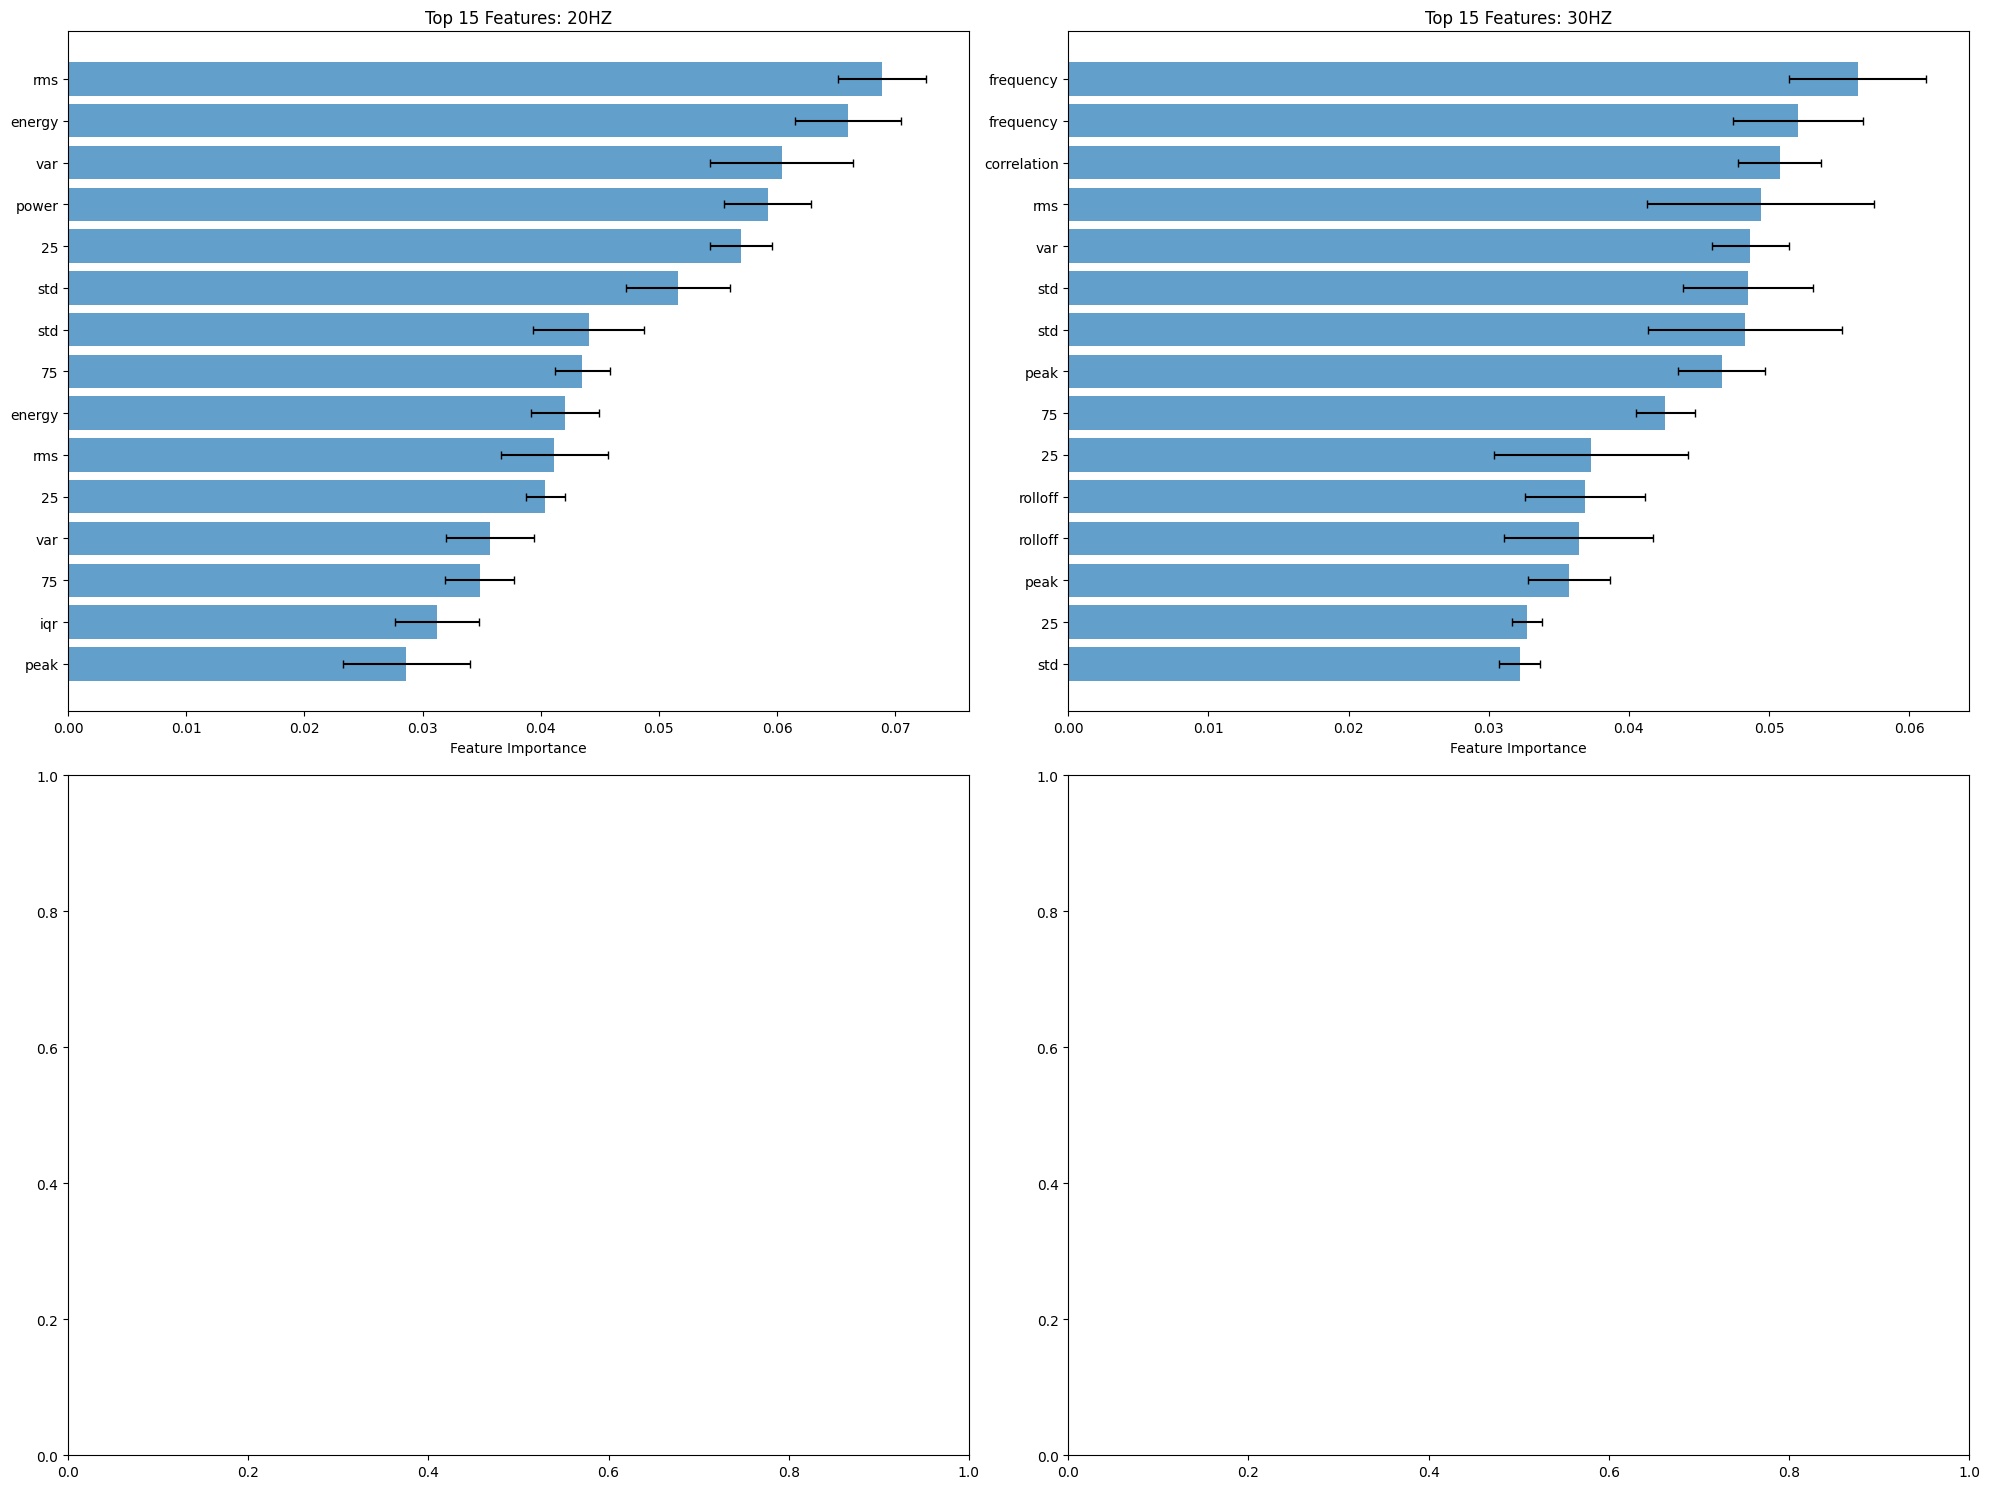


CROSS-FREQUENCY FEATURE RANKING


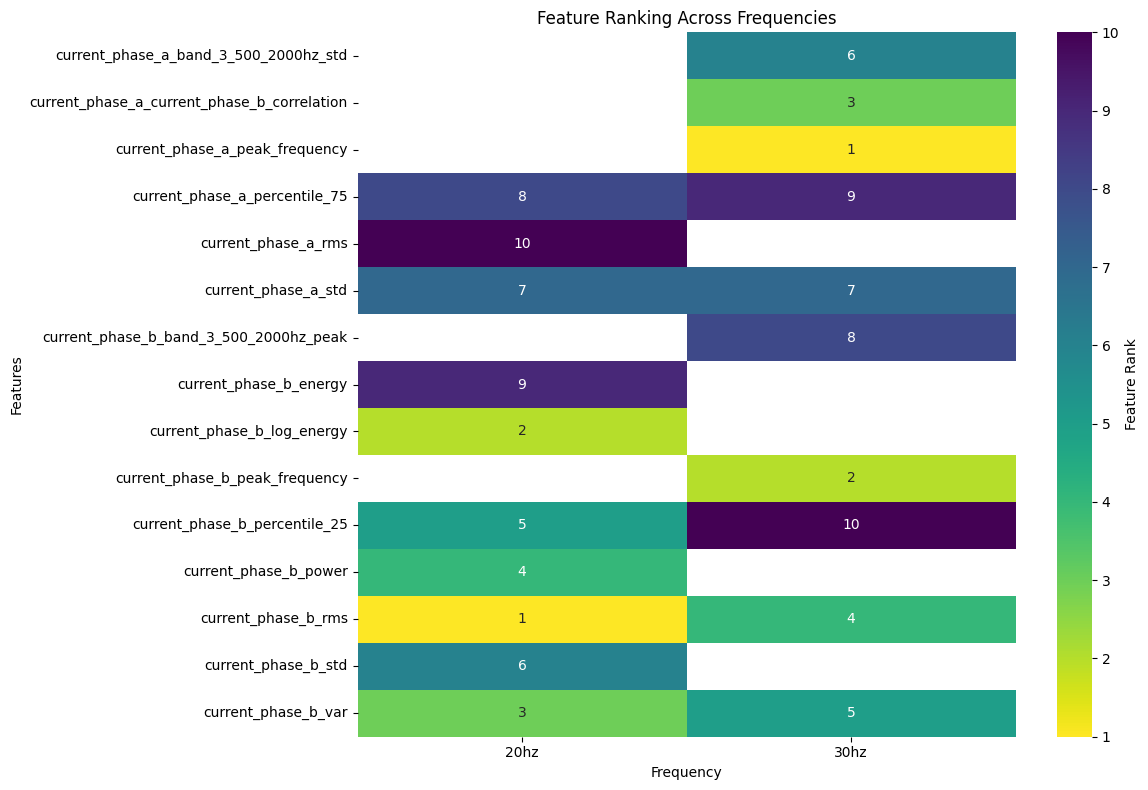

In [ ]:
# Feature importance analysis has been moved to SHAP analysis
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

print("📝 NOTE: Feature importance analysis has been moved to a dedicated SHAP analysis module.")
print("   For feature importance analysis, use the new run_comprehensive_shap_analysis function:")
print()
print("   Example:")
print("   from ml_toolbox.analysis import shap_analysis")
print("   oob_results, shap_results = shap_analysis.run_comprehensive_shap_analysis(")
print("       data_loader, frequencies_to_analyze, load='under_load',")
print("       max_windows_per_class=max_windows_per_class,")
print("       window_length=window_length, export_to_excel=True)")
print()
print("   This provides both OOB (Random Forest) and SHAP importance analysis")
print("   with comprehensive visualizations and Excel export.")
print()
print("🎯 run_comprehensive_frequency_analysis now focuses only on CV performance analysis")
print("   and returns only cv_results (not importance_results)")